**Expand the '...' cell below and run it.  It includes a function which is used to create the skc_df necessary throughout this notebook.**

(I've collapsed it simply because it's ugly)

In [1]:
def create_skc_df():
    # import relevant packages
    import psycopg2
    import pandas as pd
    import numpy as np
    import matplotlib.pyplot as plt


    # Establish DB:
    DBNAME = "opportunity_youth"

    # Create a connection to db
    conn = psycopg2.connect(dbname=DBNAME)
    
    # define initial skc_df with appropriate age range
    def skc_df():
    
        skc_puma_codes = ['11613', '11614', '11615', '11612']
    
        QUERY = """
        SELECT rt AS record_type, serialno AS id, agep AS age, sex, st, pwgtp AS person_weight, puma, sch AS school_enrollment, schl AS education_attained, 
                esr AS employment_status, nwab AS absent_from_work, nwav AS avail_for_work, nwla AS layoff, nwlk AS look_for_work
        FROM pums_2017
        WHERE agep BETWEEN 16 AND 24"""

        relevant_ages_pums = pd.read_sql(QUERY, conn)
        skc_df = relevant_ages_pums[relevant_ages_pums['puma'].isin(skc_puma_codes)]    

        return skc_df
    
    # Call the above function and assign it to a variable
    skc_df = skc_df()
    
    # Add 2 new columns to skc_df:  
    skc_df['age_group'] = 'assign vals'
    skc_df['is_oy'] = 'assign bool'
    
    # Create oy employment/school variables:
    oy_employment_status = ['3', '6']
    oy_school_enrollment = ['1']
    
    # Assign values to 'is_oy'
    skc_df['is_oy'] = (skc_df['employment_status'].isin(oy_employment_status)) & (skc_df['school_enrollment'].isin(oy_school_enrollment))
    
    # Create function to categorise age into groups:
    def get_age_group(age):
        if age in range(16, 19):
            return 'Ages 16-18'
        elif age in range(19, 22):
            return 'Ages 19-21'
        else:
            return 'Ages 22-24'
        
    # Assign values to age_group using function above:
    skc_df['age_group'] = skc_df['age'].map(get_age_group)
    
    return skc_df

## Table values:

In this notebook, I create variables for the values that are necessary to fill in the table for part 3 of the project.  These will also be used for part 4. 

### Values to create:
- [x] Total Pop count and percentage for each age group
- [x] OY Pop count and percentage for each age group 
- [x] Working without diploma count and percentage for each age group 
- [x] Not an OY count and percentage for each age group 
- [x] OY, No diploma count and percentage for each age group 
- [x] OY, Disploma or GED count and percentage for each age group 
- [x] OY, Some college, no degree count and percentage for each age group 
- [x] OY, degree count and percentage for each age group 

In [2]:
skc_df = create_skc_df()

In [3]:
skc_df

,record_type,id,age,sex,st,person_weight,puma,school_enrollment,education_attained,employment_status,absent_from_work,avail_for_work,layoff,look_for_work,age_group,is_oy
32,P,2013000007063,19.0,1,53,30.0,11612,2,18,6,2,5,2,2,Ages 19-21,False
36,P,2013000008046,17.0,2,53,36.0,11613,2,13,6,2,5,2,2,Ages 16-18,False
48,P,2013000011255,17.0,2,53,13.0,11614,2,12,6,2,5,2,2,Ages 16-18,False
54,P,2013000012970,21.0,2,53,29.0,11612,3,18,6,2,5,2,2,Ages 19-21,False
57,P,2013000013525,18.0,2,53,24.0,11613,2,15,6,2,5,2,2,Ages 16-18,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37134,P,2017001386502,18.0,1,53,17.0,11613,1,11,6,3,5,3,3,Ages 16-18,True
37684,P,2017001464049,21.0,2,53,18.0,11613,1,16,6,3,5,3,3,Ages 19-21,True
37718,P,2017001470135,23.0,1,53,17.0,11613,1,14,6,3,5,3,3,Ages 22-24,True
38050,P,2017001518359,18.0,1,53,20.0,11613,1,11,6,3,5,3,3,Ages 16-18,True


## Values for Top Half of Table "Total Population":

### Total Population Row:

Make a dataframe to display the population counts:

In [6]:
tot_pops_df = skc_df.groupby(['age_group']).sum().drop(columns = ['age', 'is_oy'])
tot_pops_df.rename(columns = {'person_weight': 'population'}, inplace = True)
tot_pops_df

,population
age_group,
Ages 16-18,20635.0
Ages 19-21,17702.0
Ages 22-24,19579.0


Create a variable containing the total population of 16-24yos in SKC:

In [7]:
tot_pop = tot_pops_df.sum()
tot_pop

population    57916.0
dtype: float64

### Opportunity Youth Row:
Make a dataframe to display the opportunity youth population counts and percentages:

In [8]:
oy_pop_df = skc_df[skc_df['is_oy']].groupby(['age_group']).sum().drop(columns = ['age', 'is_oy'])
oy_pop_df.rename(columns = {'person_weight': 'population'}, inplace = True)
oy_pop_df['percentage'] = round(oy_pop_df['population'] / tot_pops_df['population'] * 100)
oy_pop_df

,population,percentage
age_group,,
Ages 16-18,1230.0,6.0
Ages 19-21,2541.0,14.0
Ages 22-24,2952.0,15.0


In [136]:
oy_tot_pop = oy_pop_df['population'].sum()
oy_tot_pop

6723.0

<BarContainer object of 3 artists>

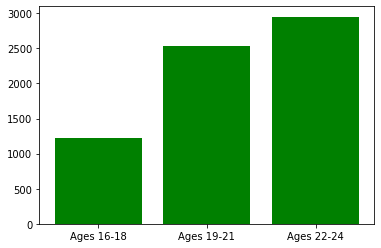

In [9]:
import matplotlib.pyplot as plt
fig, ax= plt.subplots()
ax.bar(x=oy_pop_df.index, height= oy_pop_df['population'], color = 'green')

### Working without diploma row:

Make a dataframe to display the opportunity youth population countrs and percentages:

In [185]:
work_no_dip = skc_df[(skc_df['employment_status'].isin(['1', '2', '4', '5'])) & (skc_df['education_attained'] == '15')].groupby(['age_group']).sum().drop(columns = ['age', 'is_oy'])
work_no_dip.rename(columns = {'person_weight': 'population'}, inplace = True)
#work_no_dip['percentage'] = round(work_no_dip['population'] / tot_pops_df['population'] * 100)
work_no_dip

,population
age_group,
Ages 16-18,194.0
Ages 19-21,278.0
Ages 22-24,373.0


In [140]:
work_no_dip_tot = work_no_dip['population'].sum()
work_no_dip_tot

845.0

### Not OY row:

Make a dataframe to display the non-opportunity youth population countrs and percentages:

In [141]:
noy_pop_df = skc_df[skc_df['is_oy'] == False].groupby(['age_group']).sum().drop(columns = ['age', 'is_oy'])
noy_pop_df.rename(columns = {'person_weight': 'population'}, inplace = True)
noy_pop_df['percentage'] = round(noy_pop_df['population'] / tot_pops_df['population'] * 100)
noy_pop_df

,population,percentage
age_group,,
Ages 16-18,19405.0,94.0
Ages 19-21,15161.0,86.0
Ages 22-24,16627.0,85.0


In [142]:
noy_tot_pop = noy_pop_df['population'].sum()
noy_tot_pop

51193.0

## Values for Bottom Half of Table "Opportunity Youth":

### Opportunity Youth Row:
Make a dataframe to display the opportunity youth population counts and percentages:

In [143]:
oy_pop_df

,population,percentage
age_group,,
Ages 16-18,1230.0,6.0
Ages 19-21,2541.0,14.0
Ages 22-24,2952.0,15.0


In [144]:
oy_tot_pop

6723.0

### No Diploma Row:
Make a dataframe to display the opportunity youth population **with no diploma** counts and percentages:

In [145]:
# no diploma education categories:
no_dips = list(map(str, range(1, 16)))

no_dip_df = skc_df[(skc_df['is_oy']) & (skc_df['education_attained'].isin(no_dips))].groupby(['age_group']).sum().drop(columns = ['age', 'is_oy'])
no_dip_df.rename(columns = {'person_weight': 'population'}, inplace = True)
no_dip_df['percentage'] = round(no_dip_df['population'] / oy_pop_df['population'] * 100)
no_dip_df

,population,percentage
age_group,,
Ages 16-18,690.0,56.0
Ages 19-21,714.0,28.0
Ages 22-24,481.0,16.0


In [146]:
no_dip_tot_pop = no_dip_df['population'].sum()
no_dip_tot_pop

1885.0

### HS Diploma or GED Row:
Make a dataframe to display the opportunity youth population **with diploma OR GED** counts and percentages:

In [186]:
#  Here I have included categoies '18' and '19', making the assumption that people who have completed some college must have a diploma or GED
# As it stands, I'm keeping 18/19 out as it skews the numbers... 
# When I include 18, 19, ages 16-18 add to 100% but the rest go over 100%
#  When i don't include, the total percentages are 98%, 98% and 95% respectively for each age group... 
#  Need to make a decision as what to use
dip_ged = list(map(str, range(16, 18)))

ged_df = skc_df[(skc_df['is_oy']) & (skc_df['education_attained'].isin(dip_ged))].groupby(['age_group']).sum().drop(columns = ['age', 'is_oy'])
ged_df.rename(columns = {'person_weight': 'population'}, inplace = True)
ged_df['percentage'] = round(ged_df['population'] / oy_pop_df['population'] * 100)
ged_df

,population,percentage
age_group,,
Ages 16-18,495.0,40.0
Ages 19-21,1405.0,55.0
Ages 22-24,1423.0,48.0


In [148]:
ged_tot_pop = ged_df['population'].sum()
ged_tot_pop

3323.0

### Some College, No Degree Row:
Make a dataframe to display the opportunity youth population **with some college but no degree** counts and percentages:

In [187]:
c_nodeg_df = skc_df[(skc_df['is_oy']) & (skc_df['education_attained'].isin(['18', '19']))].groupby(['age_group']).sum().drop(columns = ['age', 'is_oy'])
c_nodeg_df.rename(columns = {'person_weight': 'population'}, inplace = True)
c_nodeg_df['percentage'] = round(c_nodeg_df['population'] / oy_pop_df['population'] * 100)
c_nodeg_df

,population,percentage
age_group,,
Ages 16-18,19.0,2.0
Ages 19-21,295.0,12.0
Ages 22-24,675.0,23.0


In [188]:
c_nodeg_tot_pop = c_nodeg_df['population'].sum()
c_nodeg_tot_pop

989.0

### Degree (Associates or higher) Row:
Make a dataframe to display the opportunity youth population **with an associates degree or higher** counts and percentages:

In [189]:
# degree education categories:
degree = list(map(str, range(20, 25)))

degree_df = skc_df[(skc_df['is_oy']) & (skc_df['education_attained'].isin(degree))].groupby(['age_group']).sum().drop(columns = ['age', 'is_oy'])
degree_df.rename(columns = {'person_weight': 'population'}, inplace = True)
degree_df['percentage'] = round(degree_df['population'] / oy_pop_df['population'] * 100)
degree_df

,population,percentage
age_group,,
Ages 19-21,69.0,3.0
Ages 22-24,223.0,8.0


In [190]:
degree_tot_pop = degree_df['population'].sum()
degree_tot_pop

292.0

# OY Education Levels

In [10]:
schl = list(map(str, range(1,25)))
oy_schl_mask = (skc_df['is_oy']) & (skc_df['education_attained'].isin(schl))
oy_schl_df = skc_df[oy_schl_mask].groupby(['age_group', 'education_attained']).sum().drop(columns = ['age', 'is_oy'])

oy_schl_df.rename(columns = {'person_weight': 'population'}, inplace = True)
#oy_schl_df['percentage'] = round(oy_schl_df['population'] / oy_pop_df['population'] * 100)
oy_schl_df

population
age_group  education_attained            
Ages 16-18 11                        37.0
           12                       263.0
           13                       157.0
           14                       120.0
           15                       113.0
           16                       470.0
           17                        25.0
           19                        19.0
Ages 19-21 11                        22.0
           12                        93.0
           13                       147.0
           14                       188.0
           15                       264.0
           16                      1297.0
           17                       108.0
           18                        23.0
           19                       272.0
           20                        69.0
Ages 22-24 11                        98.0
           12                       112.0
           13                        61.0
           14                        63.0
           15                       147.0
           16                      1233.0
           17                       190.0
           18                       358.0
           19                       317.0
           20                        65.0
           21                       137.0
           22                        21.0

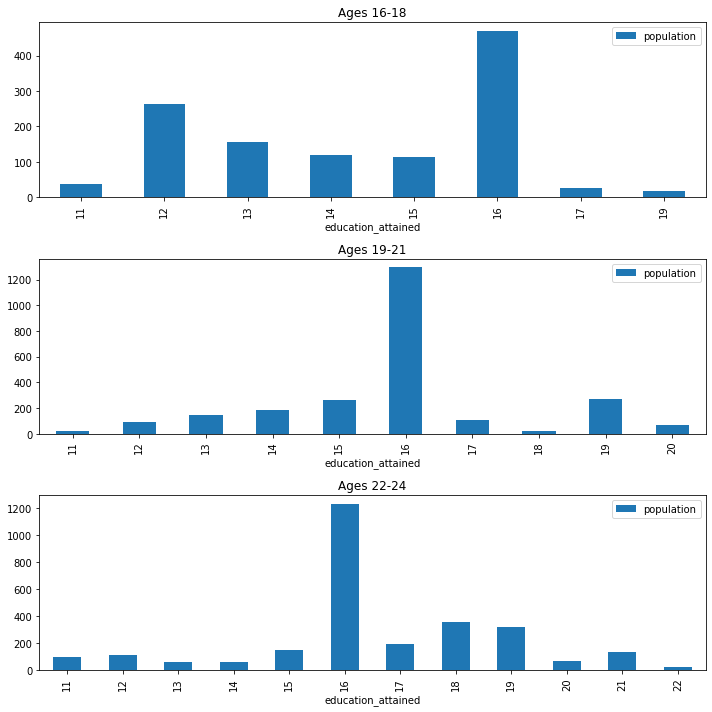

In [14]:
oy_schl_levels = oy_schl_df.index.levels[0]

fig, axes= plt.subplots(len(oy_schl_levels), figsize=(10,10))
for level, ax in zip(oy_schl_levels, axes):
    oy_schl_df.loc[level].plot(kind= 'bar', ax=ax, title=str(level))
plt.tight_layout()

# OY Employment information
1, 2, 4, 5= employed, 3 = unemployed, 6 = not in labor force (never worked)

In [15]:
# unemployed v not in labor force:
oy_esr_mask = (skc_df['is_oy']) & (skc_df['employment_status'].isin(['1', '2', '3','4', '5','6']))
oy_esr_df = skc_df[oy_esr_mask].groupby(['age_group', 'employment_status']).sum().drop(columns = ['age', 'is_oy'])
oy_esr_df.rename(columns = {'person_weight': 'population'}, inplace = True)
oy_esr_df

population
age_group  employment_status            
Ages 16-18 3                       340.0
           6                       890.0
Ages 19-21 3                       741.0
           6                      1800.0
Ages 22-24 3                      1169.0
           6                      1783.0

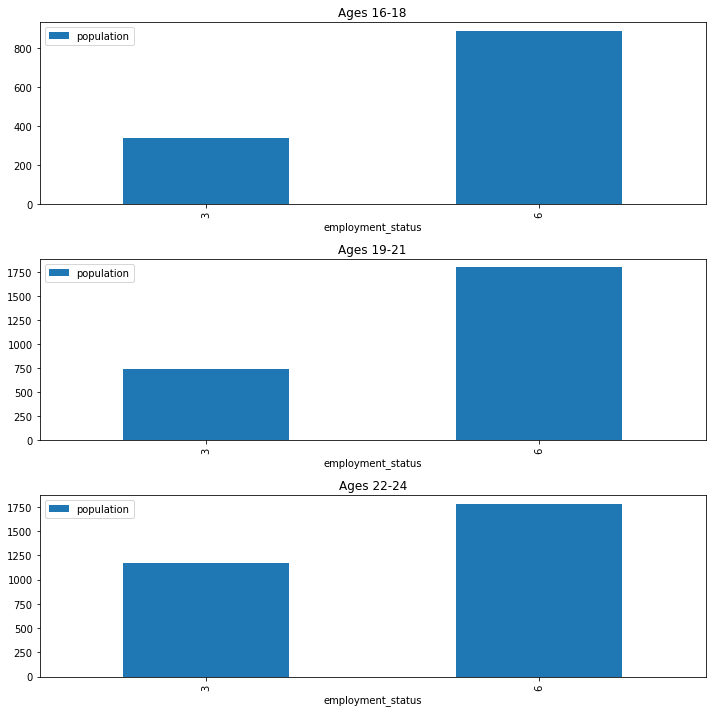

In [16]:
oy_esr_levels = oy_esr_df.index.levels[0]
fig, axes= plt.subplots(len(oy_esr_levels), figsize=(10,10))
for level, ax in zip(oy_esr_levels, axes):
    oy_esr_df.loc[level].plot(kind= 'bar', ax=ax, title=str(level))
plt.tight_layout()

### OY Unemployed- Available for work
1 = yes
2 - 4 = no
5 = not reported

In [17]:
# available for work:
oy_nwav_mask=(skc_df['is_oy']) & (skc_df['avail_for_work'].isin(['1', '2', '3', '4', '5']))
oy_nwav_df = skc_df[oy_nwav_mask].groupby(['age_group', 'avail_for_work']).sum().drop(columns = ['age', 'is_oy'])
oy_nwav_df.rename(columns = {'person_weight': 'population'}, inplace = True)
oy_nwav_df

population
age_group  avail_for_work            
Ages 16-18 1                    308.0
           3                     84.0
           5                    838.0
Ages 19-21 1                    758.0
           3                     99.0
           5                   1684.0
Ages 22-24 1                   1017.0
           2                     30.0
           3                     64.0
           5                   1841.0

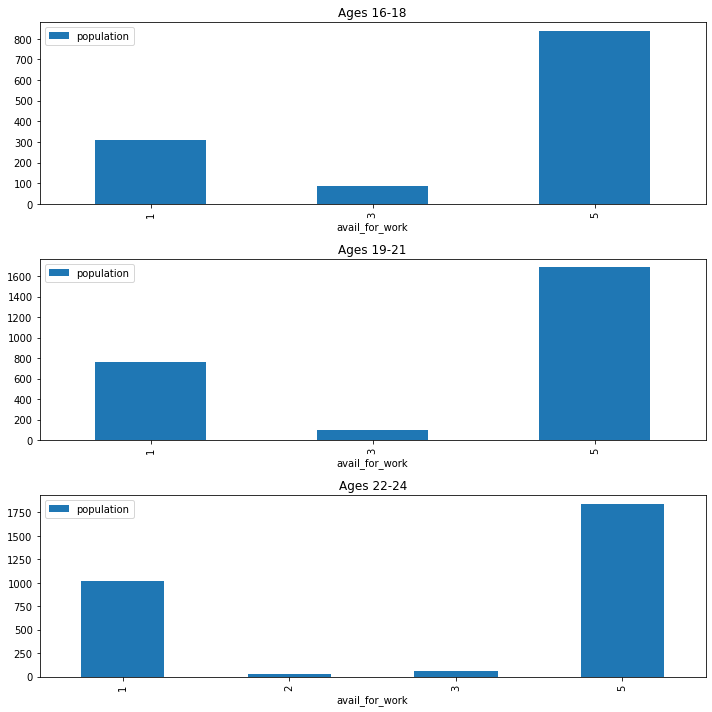

In [18]:
oy_nwav_levels = oy_nwav_df.index.levels[0]

fig, axes= plt.subplots(len(oy_nwav_levels), figsize=(10,10))
for level, ax in zip(oy_nwav_levels, axes):
    oy_nwav_df.loc[level].plot(kind= 'bar', ax=ax, title=str(level))
plt.tight_layout()

### OY Unemployed - Looking for work
1 = yes
2 = no
3 = not reported

In [19]:
# looking for work:

oy_nwlk_mask = (skc_df['is_oy']) & (skc_df['look_for_work'].isin(['1', '2', '3']))

oy_nwlk_df = skc_df[oy_nwlk_mask].groupby(['age_group', 'look_for_work']).sum().drop(columns = ['age', 'is_oy'])
oy_nwlk_df.rename(columns = {'person_weight': 'population'}, inplace = True)
oy_nwlk_df

population
age_group  look_for_work            
Ages 16-18 1                   308.0
           2                   782.0
           3                   140.0
Ages 19-21 1                   749.0
           2                  1504.0
           3                   288.0
Ages 22-24 1                  1050.0
           2                  1523.0
           3                   379.0

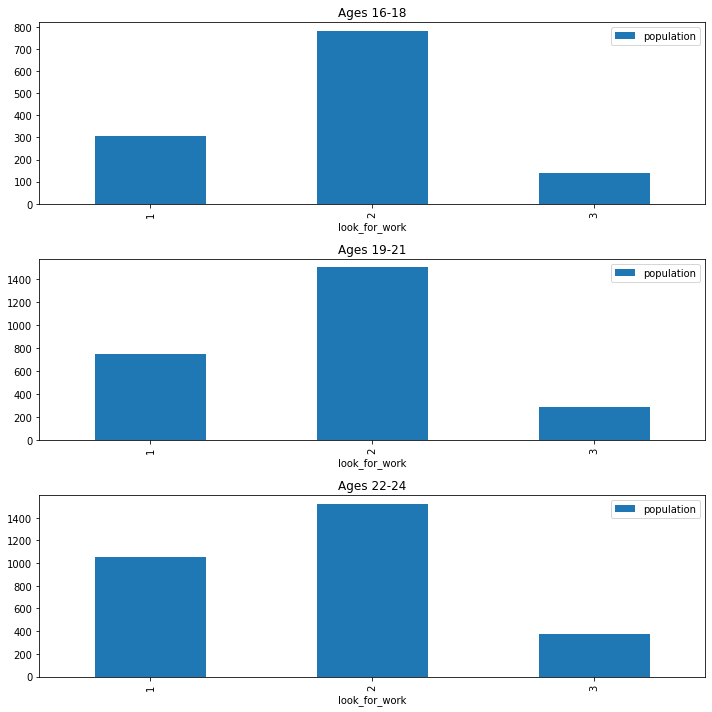

In [20]:
oy_nwlk_levels = oy_nwlk_df.index.levels[0]

fig, axes= plt.subplots(len(oy_nwlk_levels), figsize=(10,10))
for level, ax in zip(oy_nwlk_levels, axes):
    oy_nwlk_df.loc[level].plot(kind= 'bar', ax=ax, title=str(level))
plt.tight_layout()

### OY Unemployed - Layoff
1=yes, 2=no, 3=not reported

In [22]:
# layoff from work:
oy_nwla_mask = (skc_df['is_oy']) & (skc_df['layoff'].isin(['1', '2', '3']))
oy_nwla_df = skc_df[oy_nwla_mask].groupby(['age_group', 'layoff']).sum().drop(columns = ['age', 'is_oy'])
oy_nwla_df.rename(columns = {'person_weight': 'population'}, inplace = True)
oy_nwla_df

population
age_group  layoff            
Ages 16-18 2           1061.0
           3            169.0
Ages 19-21 1            155.0
           2           2073.0
           3            313.0
Ages 22-24 1             70.0
           2           2528.0
           3            354.0

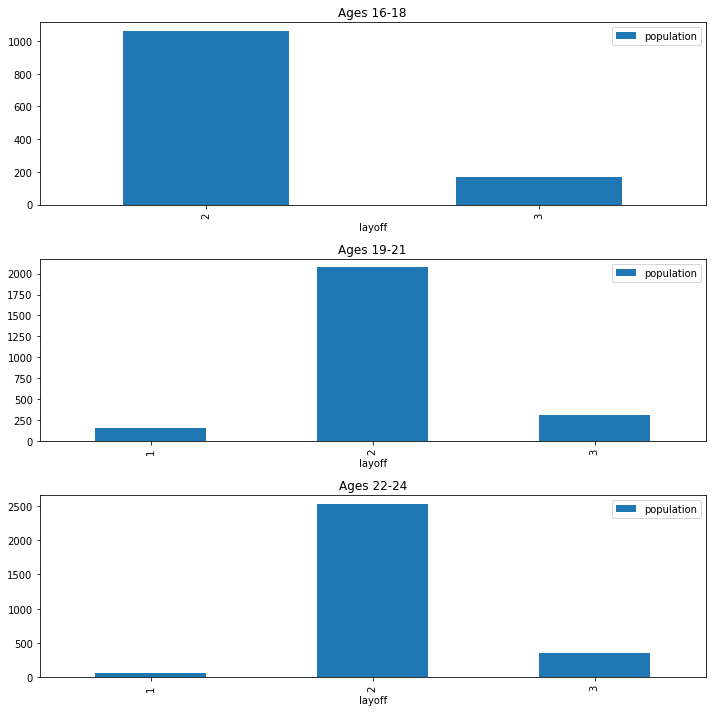

In [23]:
oy_nwla_levels = oy_nwla_df.index.levels[0]

fig, axes= plt.subplots(len(oy_nwla_levels), figsize=(10,10))
for level, ax in zip(oy_nwla_levels, axes):
    oy_nwla_df.loc[level].plot(kind= 'bar', ax=ax, title=str(level))
plt.tight_layout()

### Non-OY Unemployment Status

In [24]:
# unemployed v not in labor force:
kc_esr_mask = (skc_df['is_oy'] == False) & (skc_df['employment_status'].isin(['1','2','3','4', '5','6']))
kc_esr_df = skc_df[kc_esr_mask].groupby(['age_group', 'employment_status']).sum().drop(columns = ['age', 'is_oy'])
kc_esr_df.rename(columns = {'person_weight': 'population'}, inplace = True)
kc_esr_df

population
age_group  employment_status            
Ages 16-18 1                      4805.0
           2                        62.0
           3                      1246.0
           6                     13292.0
Ages 19-21 1                      9977.0
           2                       452.0
           3                       709.0
           4                        27.0
           6                      3996.0
Ages 22-24 1                     14152.0
           2                       332.0
           3                       376.0
           4                       117.0
           6                      1650.0

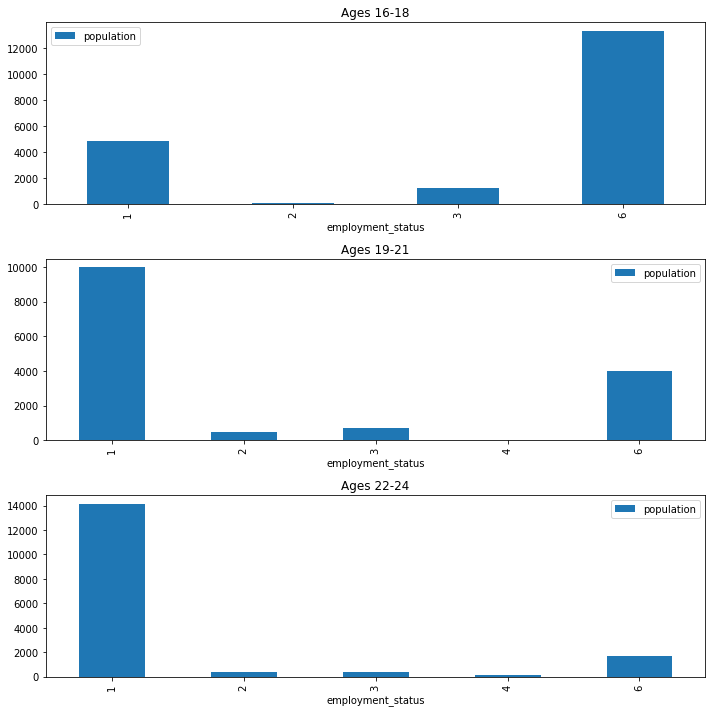

In [25]:
kc_esr_levels = kc_esr_df.index.levels[0]

fig, axes= plt.subplots(len(kc_esr_levels), figsize=(10,10))
for level, ax in zip(kc_esr_levels, axes):
    kc_esr_df.loc[level].plot(kind= 'bar', ax=ax, title=str(level))
plt.tight_layout()

### Non-OY Unemployed- Available to Work

In [26]:
# available for work:
kc_nwav_mask=(skc_df['is_oy'] ==False) & (skc_df['avail_for_work'].isin(['1', '2', '3', '4', '5']))
kc_nwav_df = skc_df[kc_nwav_mask].groupby(['age_group', 'avail_for_work']).sum().drop(columns = ['age', 'is_oy'])
kc_nwav_df.rename(columns = {'person_weight': 'population'}, inplace = True)
kc_nwav_df

population
age_group  avail_for_work            
Ages 16-18 1                   1258.0
           2                     12.0
           3                    716.0
           5                  17419.0
Ages 19-21 1                    831.0
           3                    418.0
           5                  13912.0
Ages 22-24 1                    544.0
           2                     15.0
           3                    177.0
           5                  15891.0

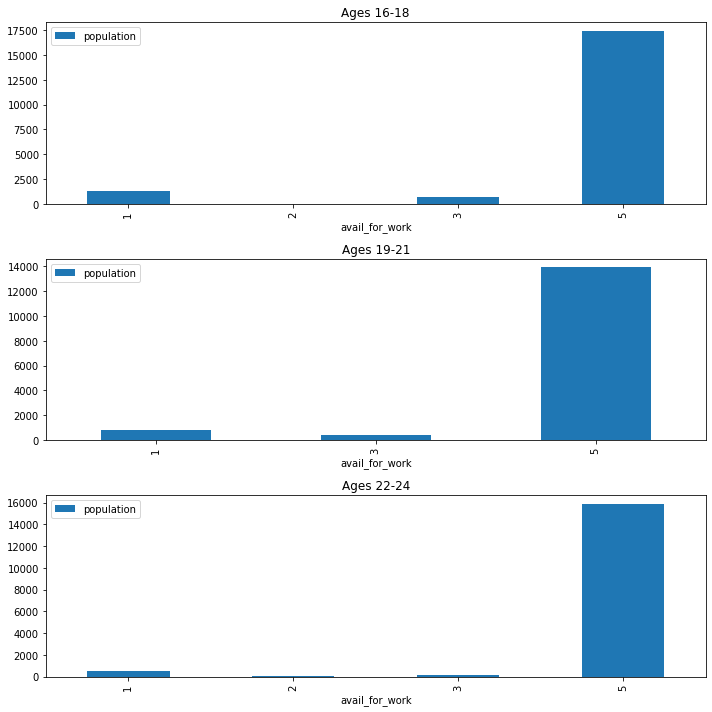

In [27]:
kc_nwav_levels = kc_nwav_df.index.levels[0]

fig, axes= plt.subplots(len(kc_nwav_levels), figsize=(10,10))
for level, ax in zip(kc_nwav_levels, axes):
    kc_nwav_df.loc[level].plot(kind= 'bar', ax=ax, title=str(level))
plt.tight_layout()

### Non-OY Unemployed- Looking for Work

In [28]:
# looking for work:

kc_nwlk_mask = (skc_df['is_oy']==False) & (skc_df['look_for_work'].isin(['1', '2', '3']))
kc_nwlk_df = skc_df[kc_nwlk_mask].groupby(['age_group', 'look_for_work']).sum().drop(columns = ['age', 'is_oy'])
kc_nwlk_df.rename(columns = {'person_weight': 'population'}, inplace = True)
kc_nwlk_df

population
age_group  look_for_work            
Ages 16-18 1                  1116.0
           2                 11894.0
           3                  6395.0
Ages 19-21 1                   895.0
           2                  3606.0
           3                 10660.0
Ages 22-24 1                   510.0
           2                  1830.0
           3                 14287.0

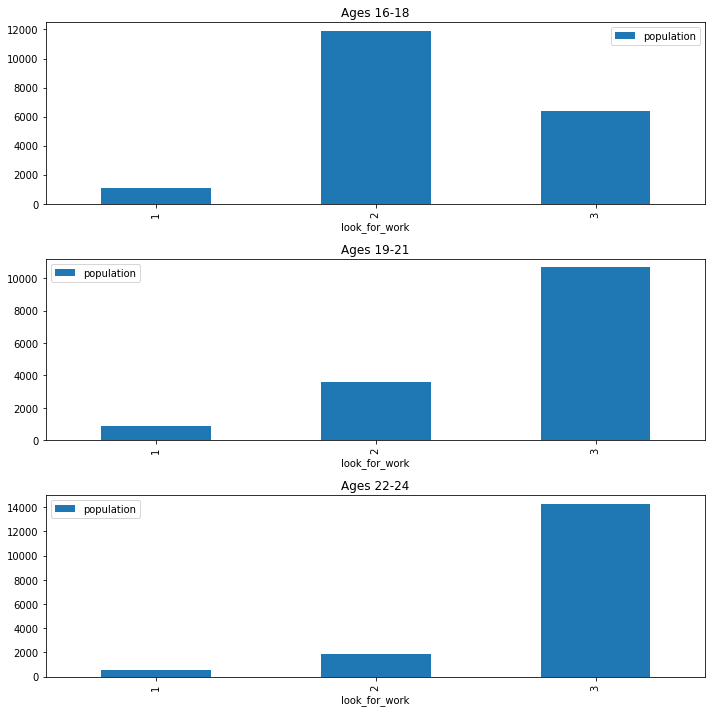

In [29]:
kc_nwlk_levels = kc_nwlk_df.index.levels[0]

fig, axes= plt.subplots(len(kc_nwlk_levels), figsize=(10,10))
for level, ax in zip(kc_nwlk_levels, axes):
    kc_nwlk_df.loc[level].plot(kind= 'bar', ax=ax, title=str(level))
plt.tight_layout()

### Non-OY Unemployed- Layoff

In [30]:
# layoff from work:
kc_nwla_mask = (skc_df['is_oy']==False) & (skc_df['layoff'].isin(['1', '2', '3']))
kc_nwla_df = skc_df[kc_nwla_mask].groupby(['age_group', 'layoff']).sum().drop(columns = ['age', 'is_oy'])
kc_nwla_df.rename(columns = {'person_weight': 'population'}, inplace = True)
kc_nwla_df

population
age_group  layoff            
Ages 16-18 1            115.0
           2          13122.0
           3           6168.0
Ages 19-21 1             16.0
           2           5018.0
           3          10127.0
Ages 22-24 1             44.0
           2           2763.0
           3          13820.0

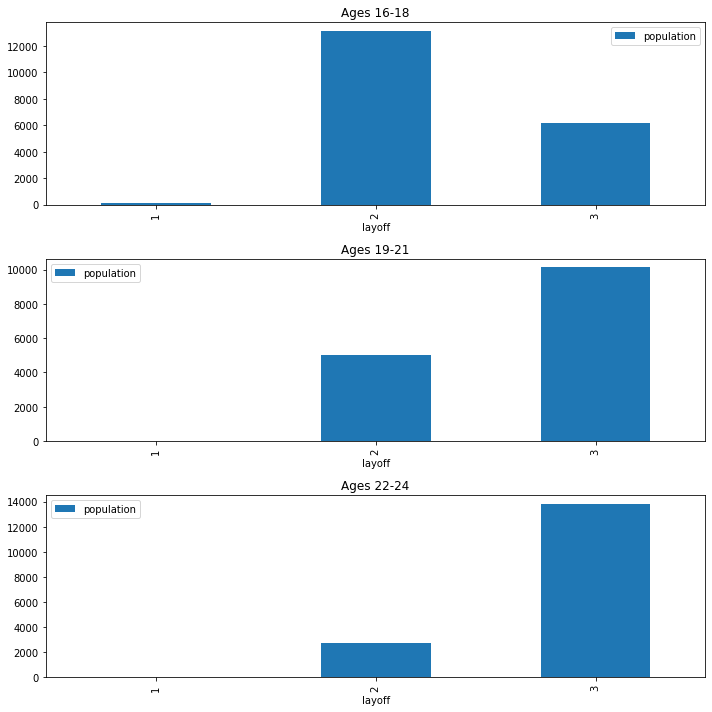

In [31]:
kc_nwla_levels = kc_nwla_df.index.levels[0]

fig, axes= plt.subplots(len(kc_nwla_levels), figsize=(10,10))
for level, ax in zip(kc_nwla_levels, axes):
    kc_nwla_df.loc[level].plot(kind= 'bar', ax=ax, title=str(level))
plt.tight_layout()

**Cells below was my pre-work while I was scratching this out.  Keeping it to keep track of what I've tried.  Can ignore!**

Total Population of Ages 16-18 in SKC:

In [27]:
tot_pop_1618 = skc_df[skc_df['age_group'] == 'Ages 16-18']['person_weight'].sum()
tot_pop_1618

20635.0

Total Population of Ages 19-21 in SKC:

In [6]:
tot_pop_1921 = skc_df[skc_df['age_group'] == 'Ages 19-21']['person_weight'].sum()

Total Population of Ages 22-24 in SKC:

In [7]:
tot_pop_2224 = skc_df[skc_df['age_group'] == 'Ages 22-24']['person_weight'].sum()

Total Population of Ages 16-24 in SKC:

In [8]:
tot_pop_1624 = sum([tot_pop_1618, tot_pop_1921, tot_pop_2224])

### Opportunity Youth Row:

In [9]:
def create_value_oy(age_group):
    """
    Function returns value (float) needed for statistics table. 
    age_group (str)
    
    """
    return skc_df[(skc_df['age_group'] == age_group) & (skc_df['is_oy'])]['person_weight'].sum()

In [10]:
def create_percentage(sub_pop, tot_pop):
    """
    Function returns rounded percentage (float) needed for statistics table.
    sub_pop (float) population you're finding the percentage of
    tot_pop (float) total population to be in denominator
    """
    return round(sub_pop / tot_pop * 100)

Opportunity Youth Population of Ages 16-18 in SKC:

In [11]:
oy_pop_1618 = create_value_oy('Ages 16-18')

Opportunity Youth Percentage of Ages 16-18 in SKC:

In [12]:
oy_pcent_1618 = create_percentage(oy_pop_1618, tot_pop_1618)

Opportunity Youth Population of Ages 19-21 in SKC:

In [13]:
oy_pop_1921 = create_value_oy('Ages 19-21')

Opportunity Youth Percentage of Ages 19-21 in SKC:

In [14]:
oy_pcent_1921 = create_percentage(oy_pop_1921, tot_pop_1921)

Opportunity Youth Population of Ages 22-24 in SKC:

In [15]:
oy_pop_2224 = create_value_oy('Ages 22-24')

Opportunity Youth Percentage of Ages 22-24 in SKC:

In [16]:
oy_pcent_2224 = create_percentage(oy_pop_2224, tot_pop_2224)

Total Opportunity Youth Population of Ages 16-24 in SKC:

In [17]:
oy_tot_pop_1624 = sum([oy_pop_1618, oy_pop_1921, oy_pop_2224])

### Working without diploma row:

In [18]:
work_wo_dip = skc_df[(skc_df['employment_status'].isin(['1', '2', '4', '5'])) & (skc_df['education_attained'] == '15')].groupby(['age_group']).sum().drop(columns = ['age', 'is_oy'])

In [19]:
work_wo_dip

,person_weight
age_group,
Ages 16-18,194.0
Ages 19-21,278.0
Ages 22-24,373.0


In [20]:
work_wo_dip.rename(columns = {'person_weight': 'count'}, inplace = True)

In [23]:
work_wo_dip['percentage'] = round(work_wo_dip['count'] / tot_pop_1618 * 100)
work_wo_dip

In [24]:
work_wo_dip

,count,percentage
age_group,,
Ages 16-18,194.0,1.0
Ages 19-21,278.0,1.0
Ages 22-24,373.0,2.0


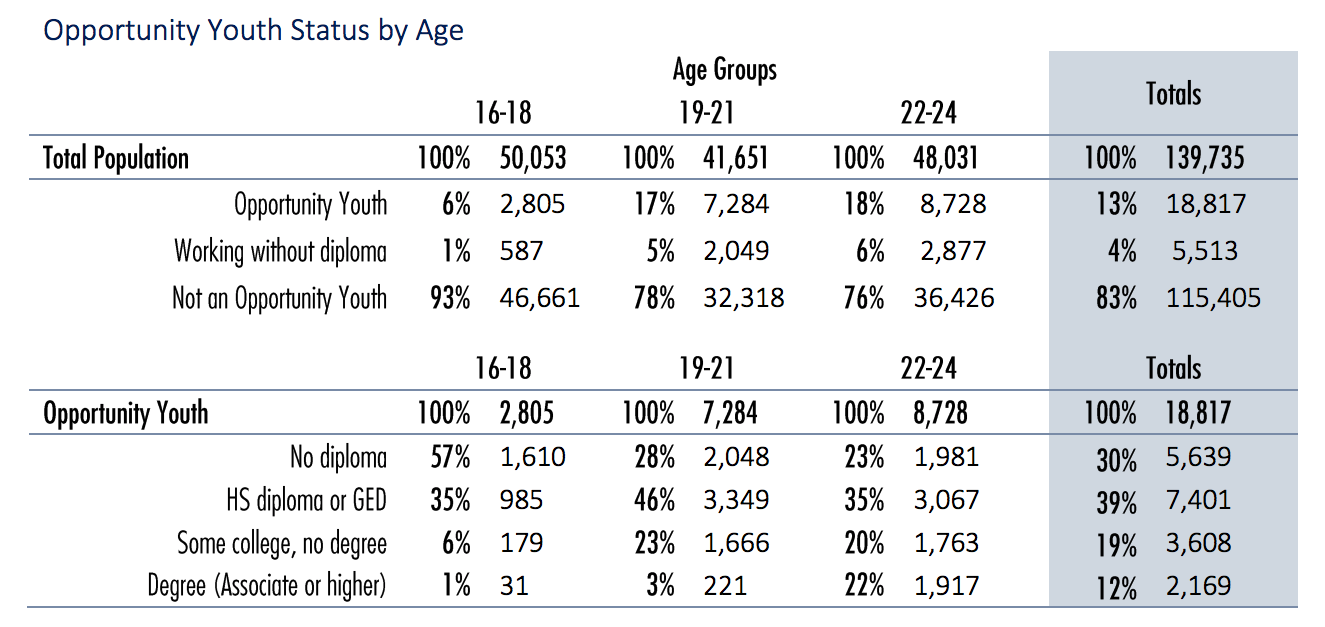